In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

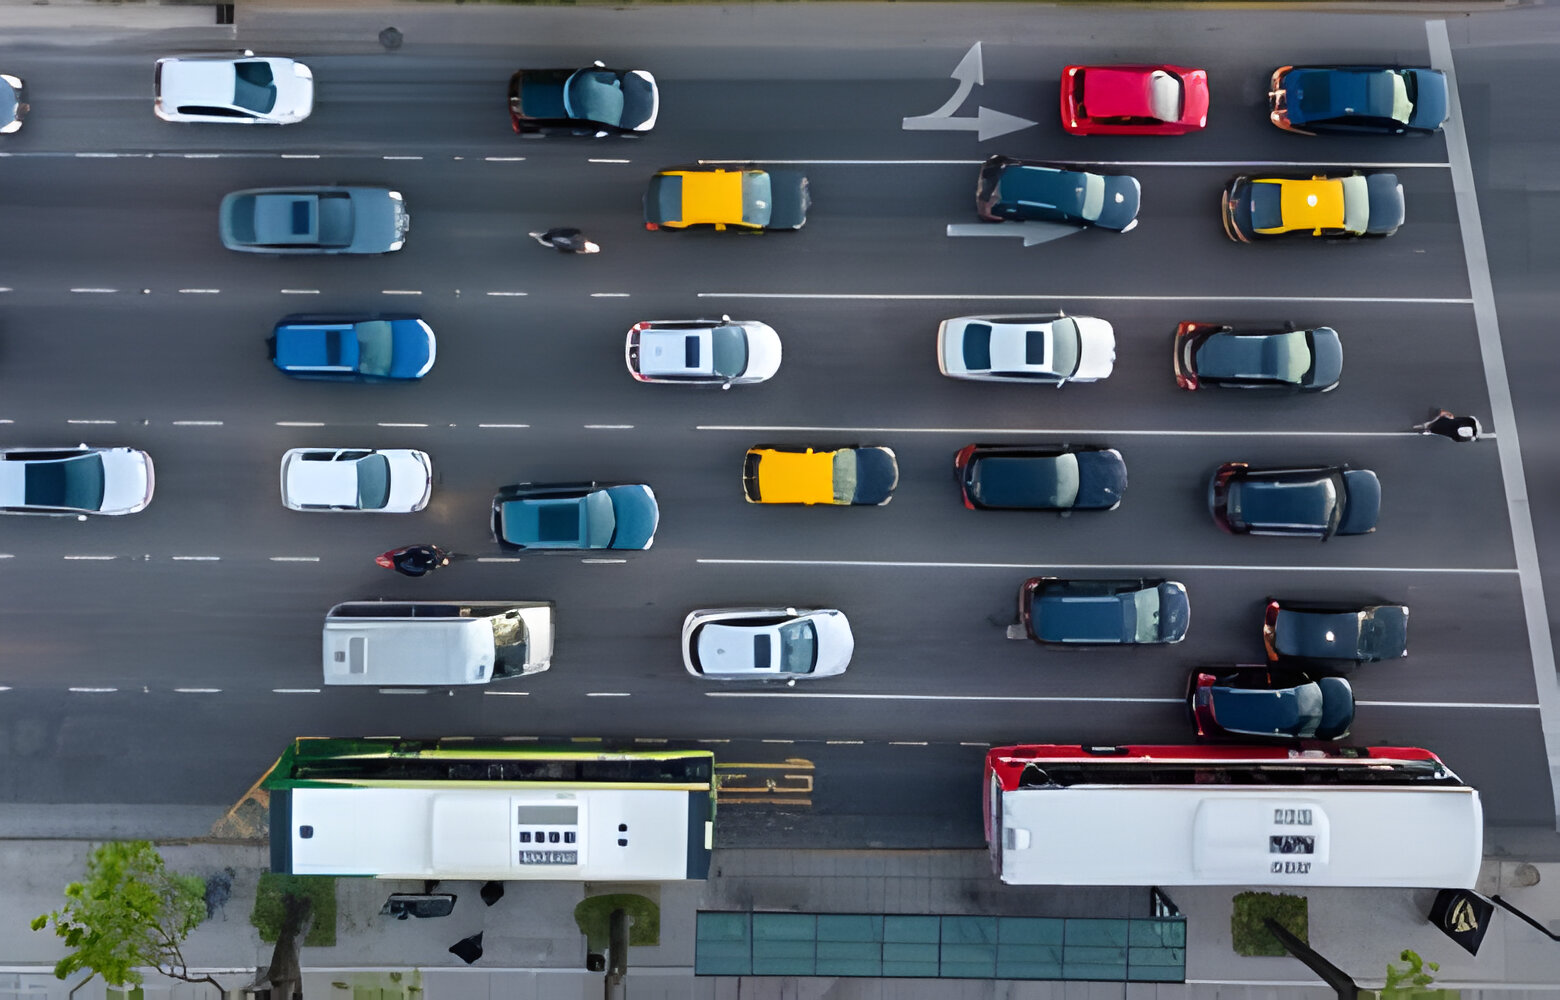

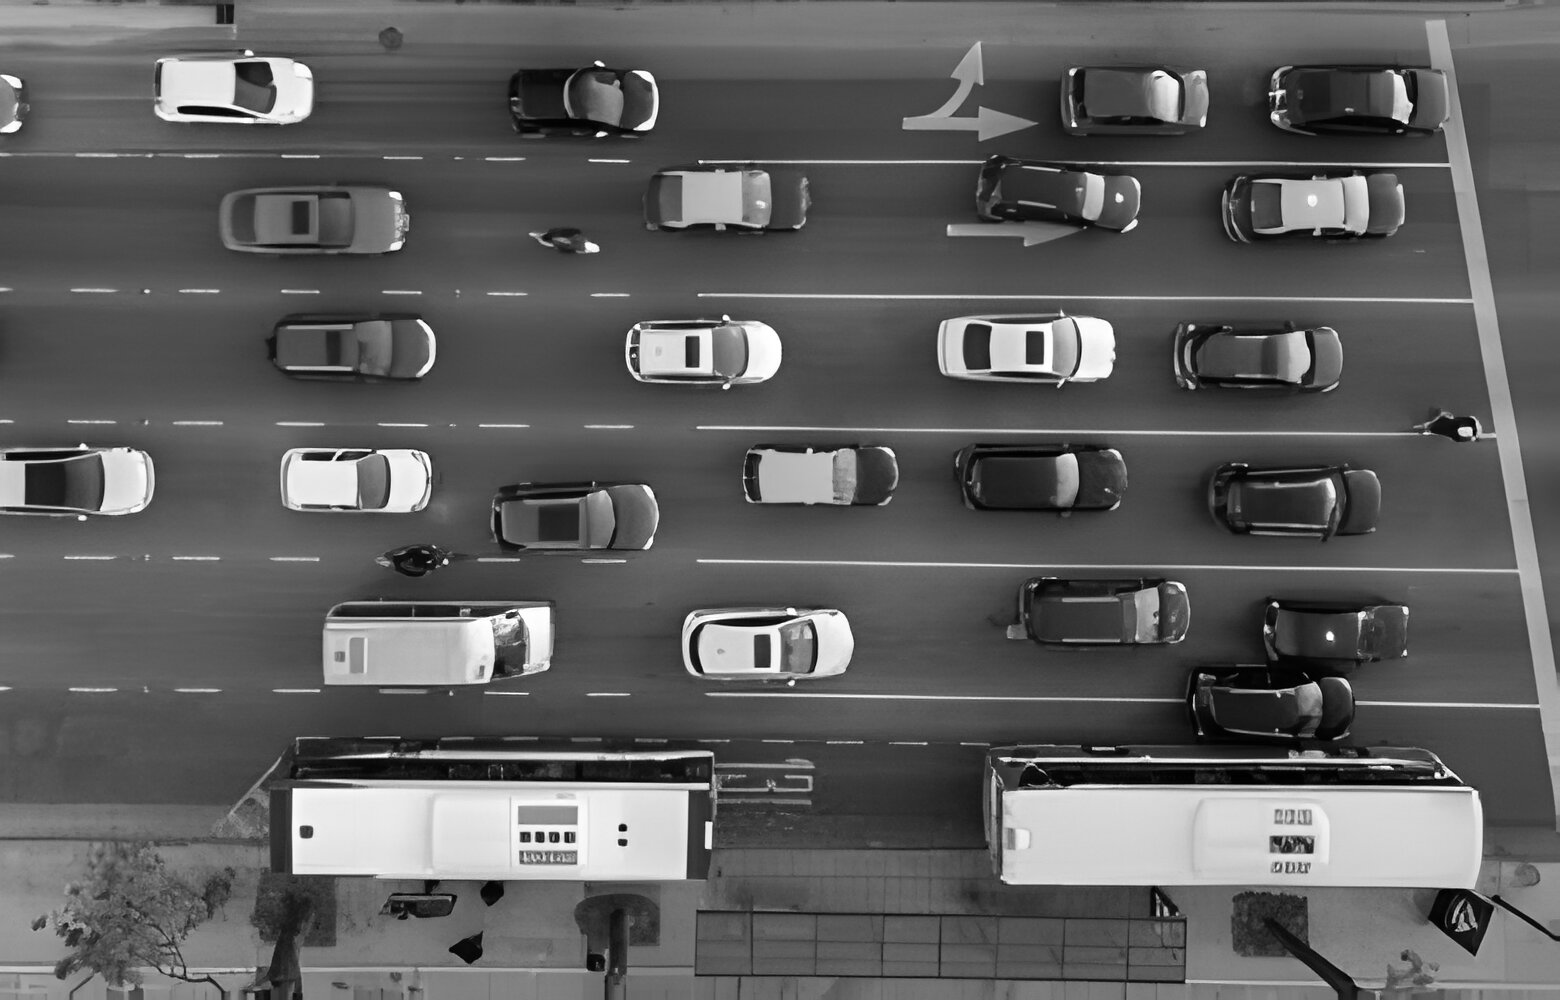

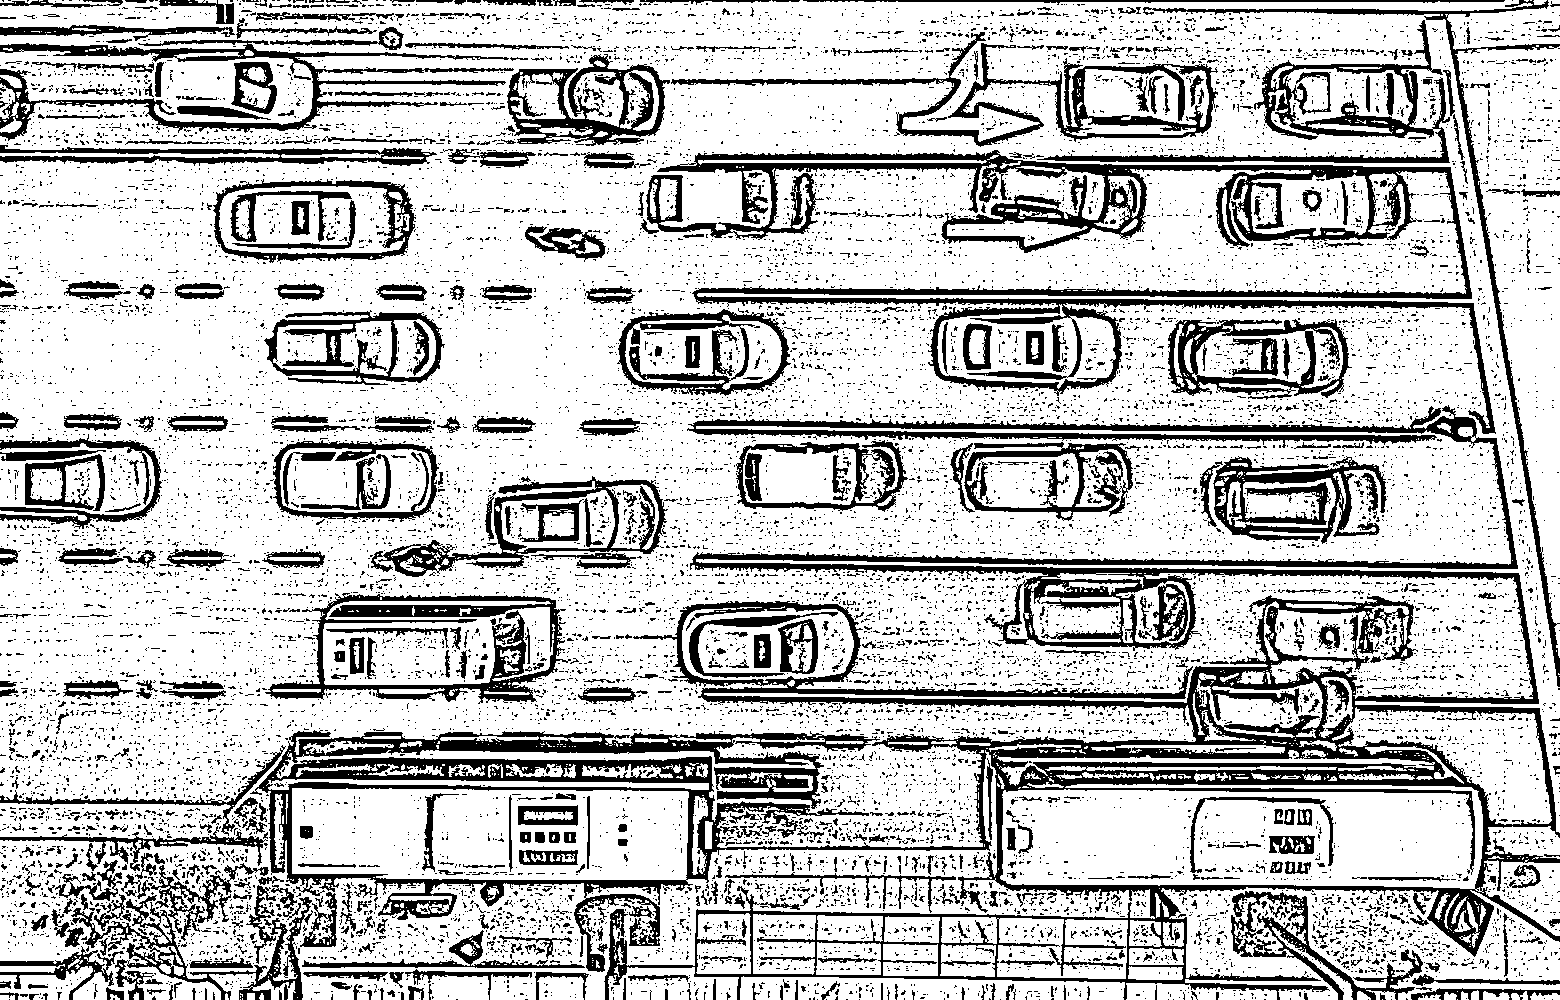

In [10]:
image = cv2.imread('images/car.jpg')
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
cv2_imshow(binary)

In [11]:
# delete noise:
kernel = np.ones((5, 5), np.uint8)
oppening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
oppening

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
# find counters
contours, _ = cv2.findContours(oppening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[1027,  997]],
 
        [[1027,  999]],
 
        [[1038,  999]],
 
        [[1038,  997]]], dtype=int32),
 array([[[ 18, 997]],
 
        [[ 18, 999]],
 
        [[ 28, 999]],
 
        [[ 28, 997]]], dtype=int32),
 array([[[883, 996]],
 
        [[883, 999]],
 
        [[887, 999]],
 
        [[887, 996]]], dtype=int32),
 array([[[691, 996]],
 
        [[691, 999]],
 
        [[695, 999]],
 
        [[695, 996]]], dtype=int32),
 array([[[ 34, 996]],
 
        [[ 34, 999]],
 
        [[ 38, 999]],
 
        [[ 38, 996]]], dtype=int32),
 array([[[ 10, 996]],
 
        [[ 10, 999]],
 
        [[ 14, 999]],
 
        [[ 14, 996]]], dtype=int32),
 array([[[1532,  995]],
 
        [[1531,  996]],
 
        [[1531,  999]],
 
        [[1543,  999]],
 
        [[1543,  996]],
 
        [[1537,  996]],
 
        [[1536,  995]]], dtype=int32),
 array([[[1523,  995]],
 
        [[1523,  999]],
 
        [[1527,  999]],
 
        [[1527,  995]]], dtype=int32),
 array([[[898, 995]],
 
  

In [13]:
min_contour_area = 3450
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

num_cars = len(large_contours)
print(f'Number of Cars in the image: {num_cars}')

Number of Cars in the image: 23
